In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df_raw = pd.read_csv('clean_data.csv')
df_raw


,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


In [3]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


In [ ]:
df = df_raw.copy()
df['date'] = pd.to_datetime(
    df[['year', 'month']].assign(day=1)
)

df = df[(df['stateDescription'] == 'U.S. Total') & (df['sectorName'] == 'all sectors')]  
df.set_index('date', inplace=True)

avg_price = df['price']
avg_price.to_csv('avg_price.csv')
avg_price


date
2001-01-01     6.75
2001-02-01     6.87
2001-03-01     7.01
2001-04-01     7.02
2001-05-01     7.17
              ...  
2023-09-01    13.19
2023-10-01    12.59
2023-11-01    12.50
2023-12-01    12.41
2024-01-01    12.73
Name: price, Length: 277, dtype: float64

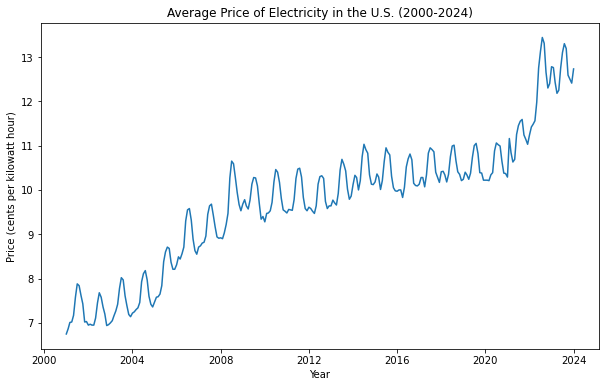

In [ ]:
plt.plot(avg_price)
plt.gcf().set_size_inches(10, 6)
plt.title('Average Price of Electricity in the U.S. (2001-2024)')
plt.xlabel('Year')
plt.ylabel('Price (cents per kilowatt hour)')
plt.show()
